## Perceptron

In [25]:
import pandas as pd
from data import *
plt.style.use('ggplot')

In [26]:
repetitions = 200
estimate_func = lambda v: unipolar(0, v)
x_all = reproduce_x_times(x_unipolar, repetitions)
d_all = reproduce_x_times(d_unipolar, repetitions)
x_all = x_all + get_random_except_first_row(x_all.shape)
x_all[:, :5], d_all[:, :5]

(array([[ 1.        ,  1.        ,  1.        ,  1.        ,  1.        ],
        [ 0.00599192,  0.01717583,  0.9542726 ,  1.03301651, -0.00430533],
        [-0.01061684,  1.01412756,  0.04724764,  1.01206276,  0.02260685]]),
 array([[0, 0, 0, 1, 0]]))

In [27]:
test_size = int(x_all.shape[1] * 0.25)
train_size = int(x_all.shape[1] - test_size)
x_train, x_test = x_all[:, :train_size], x_all[:, train_size:]
d_train, d_test = d_all[:, :train_size], d_all[:, train_size:]
x_train.shape, x_test.shape, d_train.shape, d_test.shape

((3, 600), (3, 200), (1, 600), (1, 200))

In [28]:
x_range = np.arange(-2, 4)
experiments_numb = 100

In [29]:
perceptrons = []
for alfa in list(np.linspace(0, 1, num=100))[1:]:
    p = Perceptron(x_train, d_train, x_test, d_test, estimate_func, alfa, (-0.1, 0.1))
    for i in range(experiments_numb):
        p.count()
    perceptrons.append(p)
len(perceptrons)

99

,alfas,epoch count
0,0.010101,6.67
1,0.020202,7.45
2,0.030303,7.96
3,0.040404,7.17
4,0.050505,7.42
...,...,...
94,0.959596,6.74
95,0.969697,6.99
96,0.979798,7.08
97,0.989899,6.83


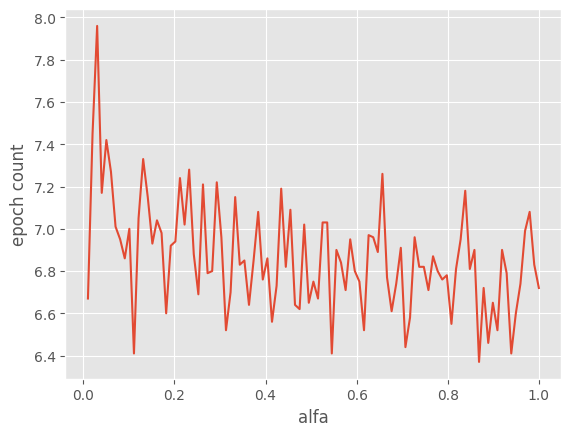

In [30]:
plt.plot([x.alfa for x in perceptrons], [x.average_epoch_count for x in perceptrons])
plt.xlabel("alfa")
plt.ylabel("epoch count")
pd.DataFrame({"alfas":[x.alfa for x in perceptrons], "epoch count":[x.average_epoch_count for x in perceptrons]})